In [59]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, VarianceThreshold, f_classif

In [100]:
ticker = 'High_Value_Dataset_July_2021_preprocessed'
input_dir = r'./data/'
file = os.path.join(input_dir, ticker + '.csv')

In [101]:
df = pd.read_csv(file, index_col = 0)
df.head(2)

,Gender,Race,Age,County,Current Facility,Offense Code,TDCJ Offense,TDCJ Number,Sentence (Years),Last Parole Decision,Parole Review Status,Parole Eligibility (Years),Sentence Left (Years)
2,1,6,85,55,92,11220000,1087,365547,999.0,0,0,18,999
3,1,2,84,173,71,9150000,7178,449674,999.0,0,0,15,999


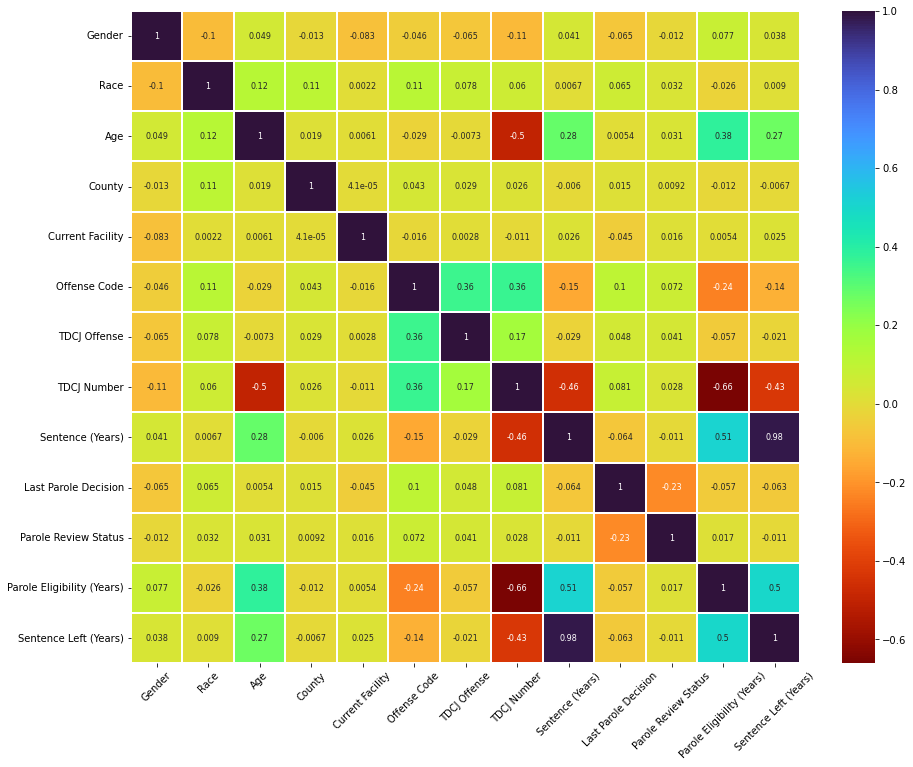

In [102]:
fig = plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True, linewidths=0.2, cmap='turbo_r', linecolor='white', annot_kws={'size':8})
plt.xticks(rotation=45)
plt.show()

<Figure size 1080x864 with 0 Axes>

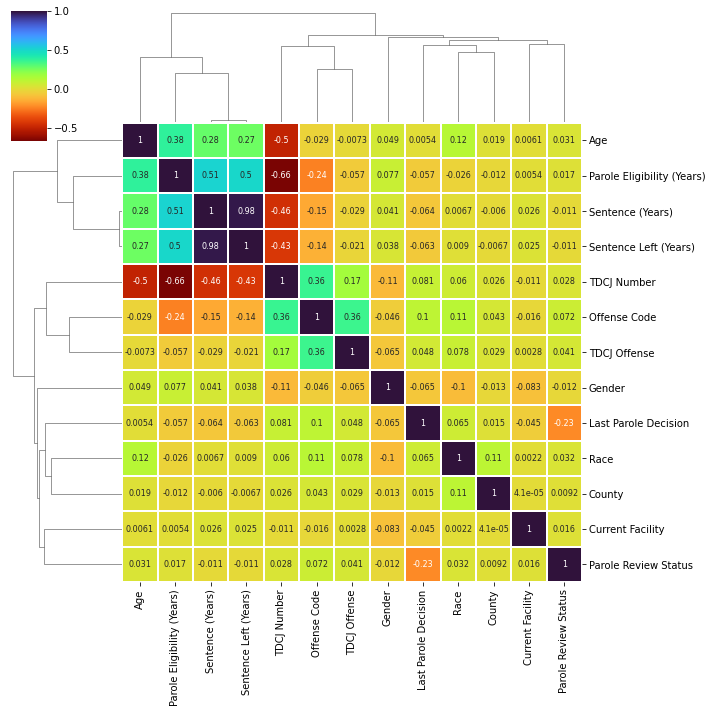

In [103]:
plt.figure(figsize=(15,12))
sns.clustermap(df.corr(), annot=True, linewidths=0.2, cmap='turbo_r', linecolor='white', annot_kws={'size':8})
plt.xticks(rotation=45)
plt.show()

## Feature Selection

#### CFSSubSet

CFSSubSetEval Attribute Selection Method from Weka

In [104]:
columns = ['Current Facility', 'Parole Review Status', 'Last Parole Decision']
df1 = df[columns]

In [105]:
df1.to_csv(os.path.join(input_dir, ticker + '_cfs.csv'))

## SelectKBest

In [86]:
## Select Best K

selector = SelectKBest(f_classif, k=4)
selector.fit_transform(df, df['Last Parole Decision'])
cols = selector.get_support(indices=True)
df_new = df.iloc[:,cols]

C:\Users\vinee\anaconda3\envs\ml\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [87]:
df_new.head(2)

,Offense Code,TDCJ Number,Last Parole Decision,Parole Review Status
2,11220000,365547,0,0
3,9150000,449674,0,0


In [81]:
df_new.to_csv(os.path.join(input_dir, ticker + '_kbest.csv'))